In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

import matplotlib as mlt
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('customer_shopping_data.csv')

In [3]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [5]:
df.shape

(99457, 10)

In [6]:
#Kiểm tra các giá trị trống
pd.isnull(df).sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [7]:
#Xóa các giá trị rỗng
df.dropna(inplace = True)

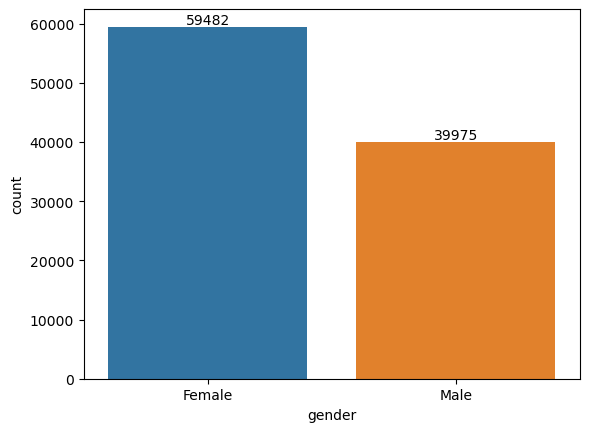

In [10]:
# Hiển thị số lượng mua hàng của mỗi giới tính
ax = sns.countplot(x = df['gender'], data = df)

for bar in ax.containers: 
    ax.bar_label(bar)

In [12]:
## Tạo Item_Total  (Price * Quantity).
df['Item_Total'] = (df['price'] * df['quantity'])/1000
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Item_Total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7.50200
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5.40153
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,0.30008
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15.00425
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,0.24240


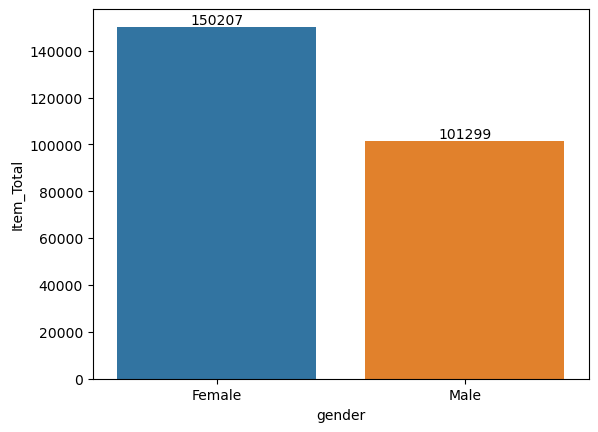

In [14]:
sales_gen = df.groupby(['gender'], as_index = False)['Item_Total'].sum()

ax = sns.barplot(x = 'gender', y = 'Item_Total', data = sales_gen)
for bar in ax.containers: 
    ax.bar_label(bar) 

In [ ]:
#Từ 2 bảng trên có thể thấy người mua hàng là nữ chiếm phần nhiều so với nam giới

In [17]:
## Xác định một hàm, để phân loại cột tuổi thành các nhóm khác nhau
def age_to_group(x):
    if (x<=20):
        return '< 20'
    elif ((x>20) & (x<=30)):
        return '20 to 30'
    elif ((x>30) & (x<=40)):
        return '30 to 40'
    elif ((x>40) & (x<50)):
        return '40 to 50'
    elif ((x>50) & (x<60)):
        return '50 to 60'
    else:
        return '> 60'
df['age_group'] = df['age'].apply(age_to_group)

#Tạo danh sách các nhóm tuổi theo thứ tự cụ thể để hiển thị tương ứng trong trục x của Barplot
agegroup = ['< 20','20 to 30','30 to 40','40 to 50','50 to 60', '> 60']

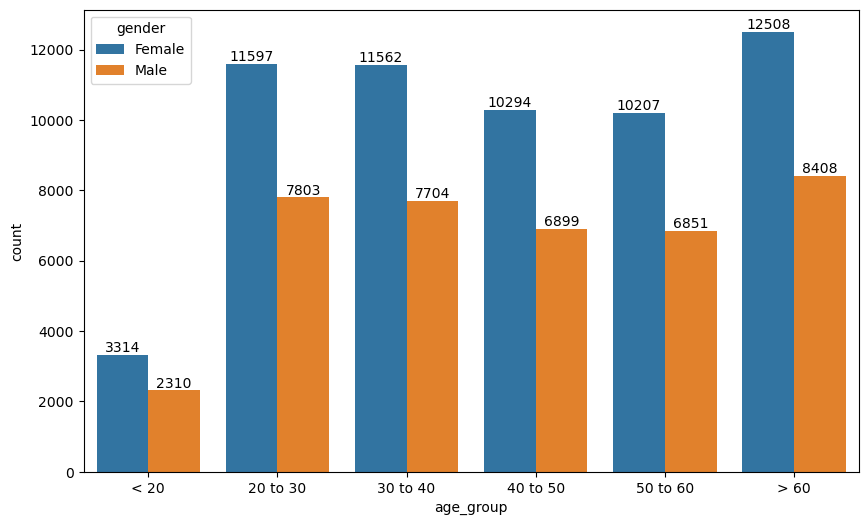

In [32]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x = 'age_group', hue = 'gender', data = df,order = agegroup)

for bar in ax.containers: 
    ax.bar_label(bar)

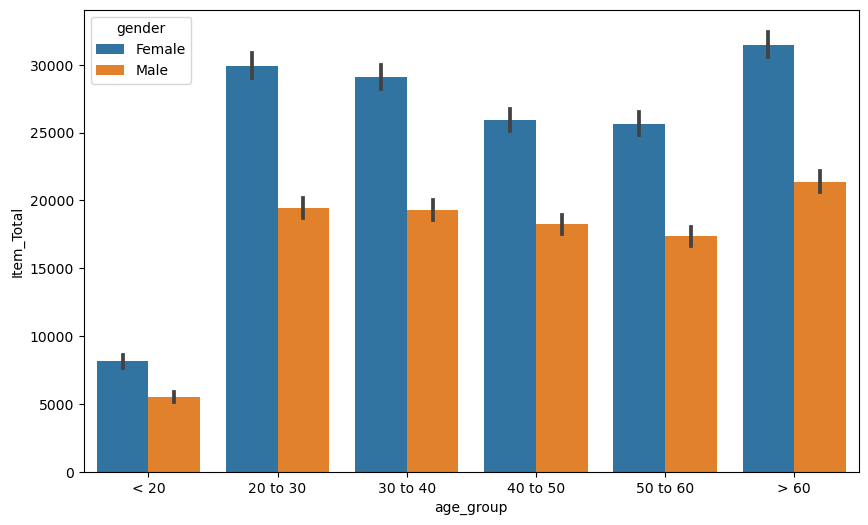

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='age_group',y='Item_Total',hue = 'gender',estimator = sum, order = agegroup)

plt.show()

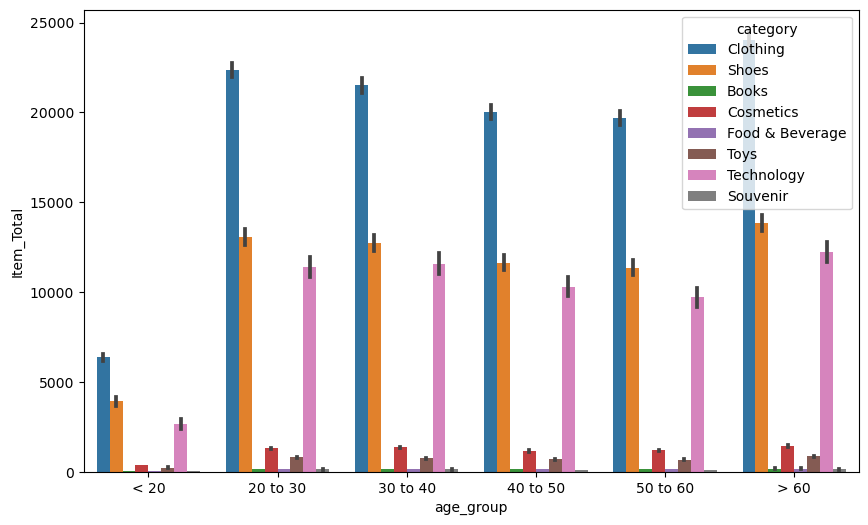

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='age_group',y='Item_Total',hue = 'category',estimator = sum, order = agegroup)
plt.show()

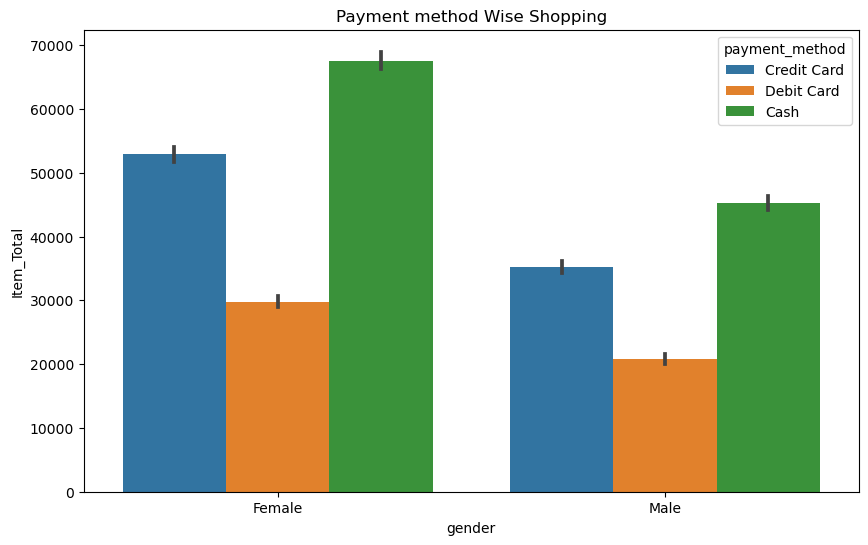

In [27]:
plt.figure(figsize=(10,6))

sns.barplot(data=df,x='gender',y='Item_Total',hue = 'payment_method',estimator = sum)
plt.show()

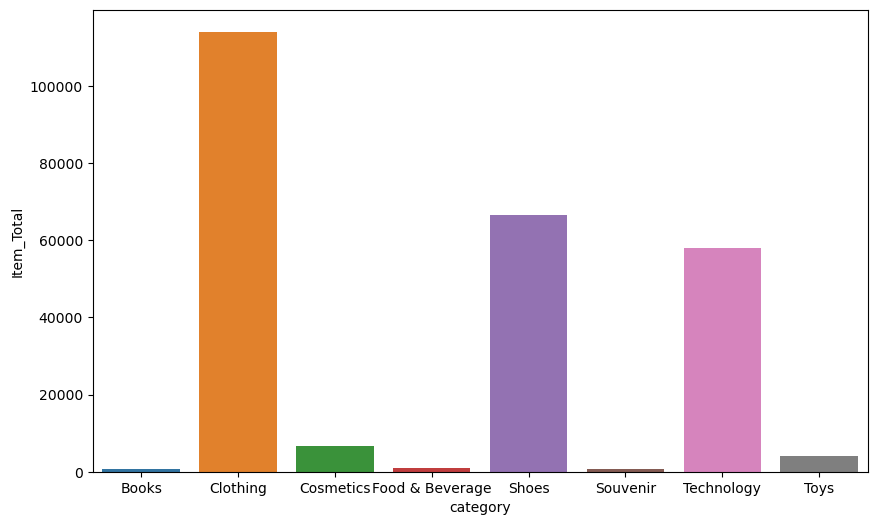

In [43]:

plt.figure(figsize=(10,6))
sales_categories = df.groupby(['category'], as_index = False)['Item_Total'].sum()

sns.barplot(x = 'category', y = 'Item_Total', data = sales_categories)
plt.show()

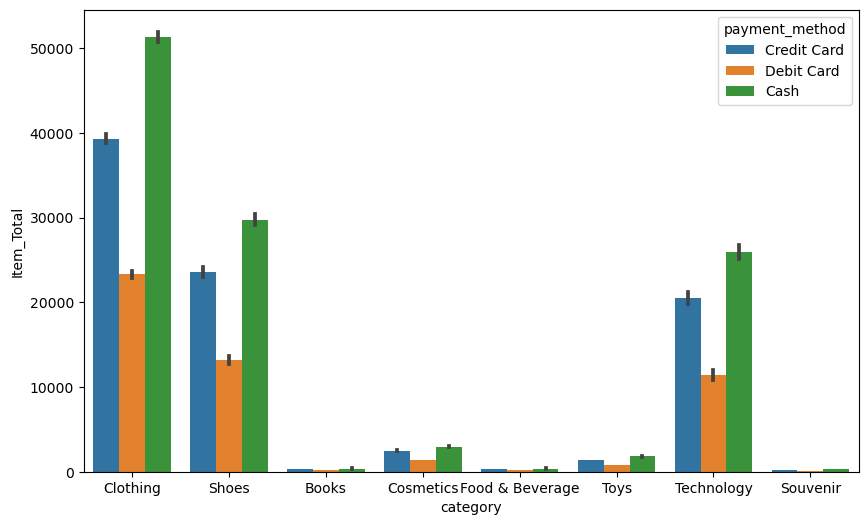

In [35]:
plt.figure(figsize=(10,6))

sns.barplot(data=df,x='category',y='Item_Total',hue = 'payment_method',estimator = sum)
plt.show()

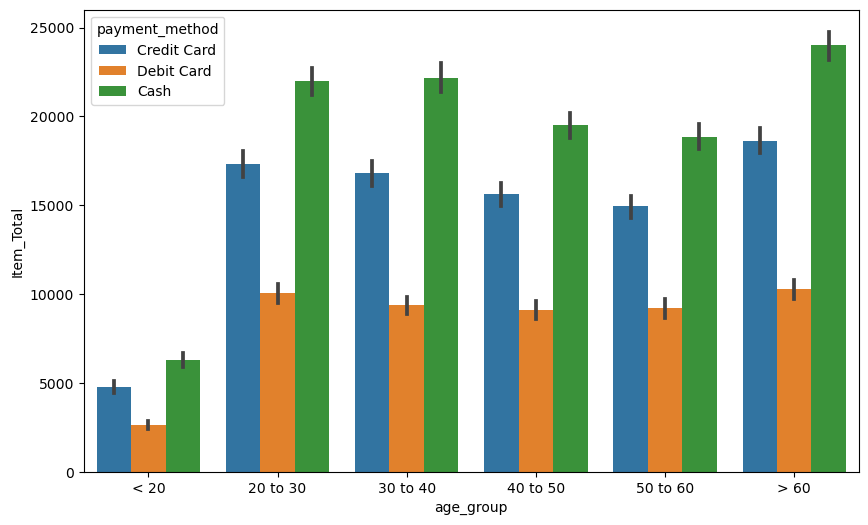

In [37]:
plt.figure(figsize=(10,6))

sns.barplot(data=df,x='age_group',y='Item_Total',hue = 'payment_method',estimator = sum,order=agegroup)
plt.show()

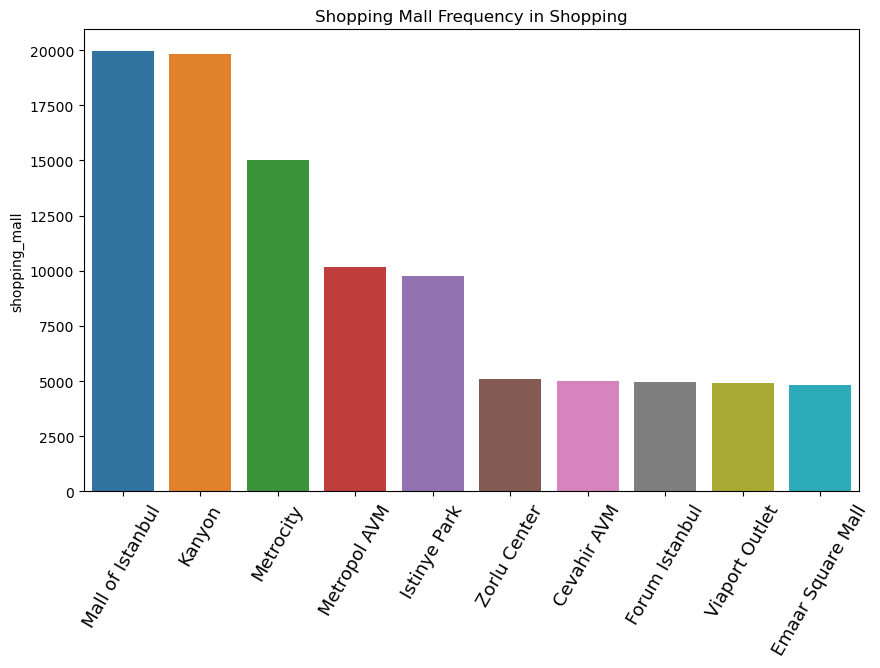

In [40]:
mall = df['shopping_mall'].value_counts()

plt.figure(figsize=(10,6))

sns.barplot(data=df,x=mall.index,y=mall)
plt.title('Shopping Mall Frequency in Shopping')
plt.xticks(rotation = 60, fontsize = 13)
plt.show()